Code to compute extneded nim-values of the positions of a finite digraph.

In [5]:
from typing import Union

INF=float('inf')
Tnim = Union[int,type(INF)]

def mex(nims:set[Tnim])->int:
  result=0
  while result in nims:
    result+=1
  return result

def compute_nims(Opt:dict[type,list[type]],withsets=0)->dict[type,Tnim]:
  nim={v:INF for v in Opt}
  done=False
  while not done:
    done=True
    for u in nim:
      if nim[u]<INF:
        continue
      nopt={nim[v] for v in Opt[u]}
      m=mex(nopt)
      if INF not in nopt:
        nim[u]=m
      else:
        inf_opt=(v for v in Opt[u] if nim[v]==INF)
        if all([any((nim[w]==m for w in Opt[v])) for v in inf_opt]):
          nim[u]=m
      if nim[u]<INF:
        done=False
  if withsets:
    nimcp=dict(nim)
    for u in nim:
      if nim[u]==INF:
        nim[u]=list({nimcp[v] for v in Opt[u] if nimcp[v]!=INF})
  return nim

Define optionsets as a dictionary and compute the nim-values.

In [6]:
# Opt={'a':[],'b':['a','c'],'c':['c','b']}
# Opt={'a':[],'b':['a'],'c':['b']}
Opt={'a':['b'],'b':[],'c':['a','b','e'],'d':['a','b'],'e':['d','f'],'f':['f']}
print(compute_nims(Opt))
nim=compute_nims(Opt,withsets=1)
print(nim)

{'a': 1, 'b': 0, 'c': 2, 'd': 2, 'e': inf, 'f': inf}
{'a': 1, 'b': 0, 'c': 2, 'd': 2, 'e': [2], 'f': []}


The rest is only needed for visualization. Use the other layouts if graphviz is not available.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def draw(Opt,nim=[]):
  plt.figure(figsize=[2.1,2.1])
  D=nx.DiGraph(Opt)
  # pos=nx.circular_layout(D)
  # pos=nx.spring_layout(D,iterations=10000)
  pos=graphviz_layout(D,prog='neato')
  if nim:
    nx.draw(D,pos,labels=nim,with_labels=True,node_color='lightgreen', arrows=True)
  else:
    nx.draw(D,pos,with_labels=True, arrows=True)
  plt.show()


Visualize the graph with original labels and nim-values.

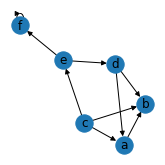

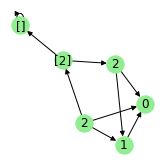

In [8]:
draw(Opt)
draw(Opt,nim)